# Getting Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv("Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Data Preparation

In [97]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [98]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [99]:
for column in categorical_columns:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [100]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [101]:
df.dtypes[df.dtypes=='object']

customerid          object
gender              object
partner             object
dependents          object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
totalcharges        object
churn               object
dtype: object

In [102]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [103]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [104]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [105]:
(df.churn == 'yes').astype('int').head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [106]:
df.churn = (df.churn == 'yes').astype('int')

In [107]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

# Setting Up Validation Framework

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)

In [206]:
len(df_full_train), len(df_test)

(5634, 1409)

In [207]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [208]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [209]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [210]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [211]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [117]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [118]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [119]:
df_full_train.churn.mean()

0.26996805111821087

In [120]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [121]:
numerical_columns = ["tenure", "monthlycharges", "totalcharges"]

In [122]:
categorical_columns = list()
for column in list(df_full_train.columns):
    if column not in (numerical_columns+['customerid', 'churn']):
        categorical_columns.append(column)
categorical_columns

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

# Feature Importance

- Churn rate
- Risk ratio

In [123]:
df_full_train.gender.value_counts(normalize=True)

male      0.503727
female    0.496273
Name: gender, dtype: float64

In [124]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [125]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [126]:
df_full_train.partner.value_counts(normalize=True)

no     0.520412
yes    0.479588
Name: partner, dtype: float64

In [127]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [128]:
churn_yes_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_yes_partner

0.20503330866025166

In [129]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [130]:
global_churn-churn_female

-0.006855983216553063

In [131]:
global_churn-churn_no_partner

-0.05984095297455855

# Risk Ratio

In [132]:
churn_no_partner / global_churn

1.2216593879412643

In [133]:
churn_yes_partner / global_churn

0.7594724924338315

In [134]:
from IPython.display import display

In [135]:
for column in categorical_columns:
    print(column)
    df_group = df_full_train.groupby(column).churn.agg({'count', 'mean'})
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk_ratio'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print('***********************************************************************')

gender


,count,mean,diff,risk_ratio
gender,,,,
female,2796,0.276824,0.006856,1.025396
male,2838,0.263214,-0.006755,0.974980



***********************************************************************
seniorcitizen


,count,mean,diff,risk_ratio
seniorcitizen,,,,
0,4722,0.242270,-0.027698,0.897403
1,912,0.413377,0.143409,1.531208



***********************************************************************
partner


,count,mean,diff,risk_ratio
partner,,,,
no,2932,0.329809,0.059841,1.221659
yes,2702,0.205033,-0.064935,0.759472



***********************************************************************
dependents


,count,mean,diff,risk_ratio
dependents,,,,
no,3968,0.313760,0.043792,1.162212
yes,1666,0.165666,-0.104302,0.613651



***********************************************************************
phoneservice


,count,mean,diff,risk_ratio
phoneservice,,,,
no,547,0.241316,-0.028652,0.893870
yes,5087,0.273049,0.003081,1.011412



***********************************************************************
multiplelines


,count,mean,diff,risk_ratio
multiplelines,,,,
no,2700,0.257407,-0.012561,0.953474
no_phone_service,547,0.241316,-0.028652,0.893870
yes,2387,0.290742,0.020773,1.076948



***********************************************************************
internetservice


,count,mean,diff,risk_ratio
internetservice,,,,
dsl,1934,0.192347,-0.077621,0.712482
fiber_optic,2479,0.425171,0.155203,1.574895
no,1221,0.077805,-0.192163,0.288201



***********************************************************************
onlinesecurity


,count,mean,diff,risk_ratio
onlinesecurity,,,,
no,2801,0.420921,0.150953,1.559152
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,1612,0.153226,-0.116742,0.567570



***********************************************************************
onlinebackup


,count,mean,diff,risk_ratio
onlinebackup,,,,
no,2498,0.404323,0.134355,1.497672
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,1915,0.217232,-0.052736,0.804660



***********************************************************************
deviceprotection


,count,mean,diff,risk_ratio
deviceprotection,,,,
no,2473,0.395875,0.125907,1.466379
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,1940,0.230412,-0.039556,0.853480



***********************************************************************
techsupport


,count,mean,diff,risk_ratio
techsupport,,,,
no,2781,0.418914,0.148946,1.551717
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,1632,0.159926,-0.110042,0.592390



***********************************************************************
streamingtv


,count,mean,diff,risk_ratio
streamingtv,,,,
no,2246,0.342832,0.072864,1.269897
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,2167,0.302723,0.032755,1.121328



***********************************************************************
streamingmovies


,count,mean,diff,risk_ratio
streamingmovies,,,,
no,2213,0.338906,0.068938,1.255358
no_internet_service,1221,0.077805,-0.192163,0.288201
yes,2200,0.307273,0.037305,1.138182



***********************************************************************
contract


,count,mean,diff,risk_ratio
contract,,,,
month-to-month,3104,0.431701,0.161733,1.599082
one_year,1186,0.120573,-0.149395,0.446621
two_year,1344,0.028274,-0.241694,0.104730



***********************************************************************
paperlessbilling


,count,mean,diff,risk_ratio
paperlessbilling,,,,
no,2313,0.172071,-0.097897,0.637375
yes,3321,0.338151,0.068183,1.252560



***********************************************************************
paymentmethod


,count,mean,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),1219,0.168171,-0.101797,0.622928
credit_card_(automatic),1217,0.164339,-0.105630,0.608733
electronic_check,1893,0.455890,0.185922,1.688682
mailed_check,1305,0.193870,-0.076098,0.718121



***********************************************************************


# Mutual Importance

To decide important between features

In [136]:
from sklearn.metrics import mutual_info_score

for column in categorical_columns:
    print(column, ':', mutual_info_score(df_full_train.churn, df_full_train[column]))
    print()

gender : 0.0001174846211139946

seniorcitizen : 0.009410216144208144

partner : 0.009967689095399745

dependents : 0.012345815445534689

phoneservice : 0.00022871269738296285

multiplelines : 0.0008574478744731856

internetservice : 0.055867945893496467

onlinesecurity : 0.06308524972985574

onlinebackup : 0.0469234640537918

deviceprotection : 0.04345286925268559

techsupport : 0.06103245991777444

streamingtv : 0.03185333110086085

streamingmovies : 0.03158089669519908

contract : 0.0983203874041556

paperlessbilling : 0.01758882715925275

paymentmethod : 0.043210027531582915



In [137]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

df_full_train[categorical_columns].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Correlation

Feature importance for numerical variables

In [138]:
df_full_train[numerical_columns].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

# One Hot Encoding

In [139]:
df[['gender', 'contract']][0:100]

,gender,contract
0,female,month-to-month
1,male,one_year
2,male,month-to-month
3,male,one_year
4,female,month-to-month
...,...,...
95,female,month-to-month
96,male,one_year
97,male,month-to-month
98,male,two_year


In [140]:
train_dicts = df_train[categorical_columns+numerical_columns].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [141]:
from sklearn.feature_extraction import DictVectorizer

In [142]:
dv = DictVectorizer(sparse=False)

In [143]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [144]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [145]:
dv.vocabulary_

{'contract=month-to-month': 0,
 'contract=one_year': 1,
 'contract=two_year': 2,
 'dependents=no': 3,
 'dependents=yes': 4,
 'deviceprotection=no': 5,
 'deviceprotection=no_internet_service': 6,
 'deviceprotection=yes': 7,
 'gender=female': 8,
 'gender=male': 9,
 'internetservice=dsl': 10,
 'internetservice=fiber_optic': 11,
 'internetservice=no': 12,
 'monthlycharges': 13,
 'multiplelines=no': 14,
 'multiplelines=no_phone_service': 15,
 'multiplelines=yes': 16,
 'onlinebackup=no': 17,
 'onlinebackup=no_internet_service': 18,
 'onlinebackup=yes': 19,
 'onlinesecurity=no': 20,
 'onlinesecurity=no_internet_service': 21,
 'onlinesecurity=yes': 22,
 'paperlessbilling=no': 23,
 'paperlessbilling=yes': 24,
 'partner=no': 25,
 'partner=yes': 26,
 'paymentmethod=bank_transfer_(automatic)': 27,
 'paymentmethod=credit_card_(automatic)': 28,
 'paymentmethod=electronic_check': 29,
 'paymentmethod=mailed_check': 30,
 'phoneservice=no': 31,
 'phoneservice=yes': 32,
 'seniorcitizen': 33,
 'streamingm

In [146]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [147]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [148]:
val_dicts = df_val[categorical_columns+numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

In [149]:
val_dicts = df_val[categorical_columns+numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

# Logistic Regression

In [150]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [151]:
z = np.linspace(-7, 7, 51)

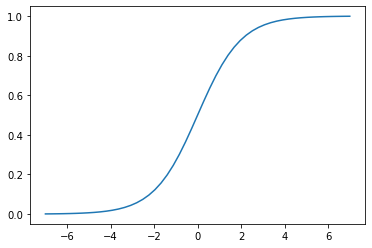

In [152]:
plt.plot(z, sigmoid(z))

In [153]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log_model = LogisticRegression()

In [157]:
log_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
# Hard predictions Explicitly predicts classes
log_model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [161]:
# Soft predictions Gives probability for both classes
y_pred = log_model.predict_proba(X_val)[:, 1]

In [169]:
df_pred =pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = (y_pred >=0.5 ).astype('int')
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008981,0,0
1,0.204219,0,0
2,0.212774,0,0
3,0.543929,1,1
4,0.214710,0,0
...,...,...,...
1404,0.308737,0,0
1405,0.039151,0,1
1406,0.136168,0,0
1407,0.798360,1,1


In [170]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual)

In [171]:
df_pred

,probability,prediction,actual,correct
0,0.008981,0,0,True
1,0.204219,0,0,True
2,0.212774,0,0,True
3,0.543929,1,1,True
4,0.214710,0,0,True
...,...,...,...,...
1404,0.308737,0,0,True
1405,0.039151,0,1,False
1406,0.136168,0,0,True
1407,0.798360,1,1,True


In [172]:
df_pred.correct.mean()

0.8026969481902059

# Model Interpretation

In [174]:
log_model.intercept_

array([-0.10857234])

In [178]:
log_model.coef_[0].round(3)

array([ 0.469, -0.174, -0.402, -0.027, -0.08 ,  0.063, -0.088, -0.082,
       -0.034, -0.073, -0.333,  0.315, -0.088,  0.004, -0.257,  0.139,
        0.011,  0.063, -0.088, -0.082,  0.265, -0.088, -0.284, -0.232,
        0.125, -0.163,  0.055, -0.087, -0.033,  0.073, -0.061,  0.139,
       -0.246,  0.214, -0.119, -0.088,  0.1  , -0.07 , -0.088,  0.051,
        0.214, -0.088, -0.233, -0.071,  0.   ])

In [182]:
dict(zip(dv.get_feature_names(), log_model.coef_[0].round(3)))

{'contract=month-to-month': 0.469,
 'contract=one_year': -0.174,
 'contract=two_year': -0.402,
 'dependents=no': -0.027,
 'dependents=yes': -0.08,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.088,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.333,
 'internetservice=fiber_optic': 0.315,
 'internetservice=no': -0.088,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.257,
 'multiplelines=no_phone_service': 0.139,
 'multiplelines=yes': 0.011,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.088,
 'onlinebackup=yes': -0.082,
 'onlinesecurity=no': 0.265,
 'onlinesecurity=no_internet_service': -0.088,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.125,
 'partner=no': -0.163,
 'partner=yes': 0.055,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.033,
 'paymentmethod=electronic_check': 0.073,


# Using the model

In [186]:
dicts_full_train = df_full_train[categorical_columns+numerical_columns].to_dict(orient='records')

In [188]:
dv = DictVectorizer(sparse=False)

In [212]:
X_full_train=dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn

In [213]:
dicts_test = df_test[categorical_columns+numerical_columns].to_dict(orient='records')
X_test=dv.transform(dicts_test)

In [214]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [215]:
y_pred = model.predict_proba(X_test)[:,1]

In [216]:
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [217]:
churn_decision = (y_pred >= 0.5)

In [218]:
(model.predict(X_test)==y_test).mean()

0.815471965933286

3.13 Summary
Feature importance - risk, mutual information, correlation
One-hot encoding can be implemented with DictVectorizer
Logistic regression - linear model like linear regression
Output of log reg - probability
Interpretation of weights is similar to linear regression
3.14 Explore more
More things

Try to exclude least useful features
Use scikit-learn in project of last week

Re-implement train/val/test split using scikit-learn in the project from the last week
Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge
Other projects

Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients